<center>
A laboratory work contains data preprocessing, 2 variants of cross-validation, the choice of optimal parameter for the Minkowski metric and the PCA sample
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Using Titanic dataset from https://www.kaggle.com/c/titanic/data for demonstration of preprocessing and kNN method

In [2]:
data = pd.read_csv('titanic/passenger_data.csv', sep = ',', engine = 'python')

In [3]:
#data

#### Demonstration of depedencies of features

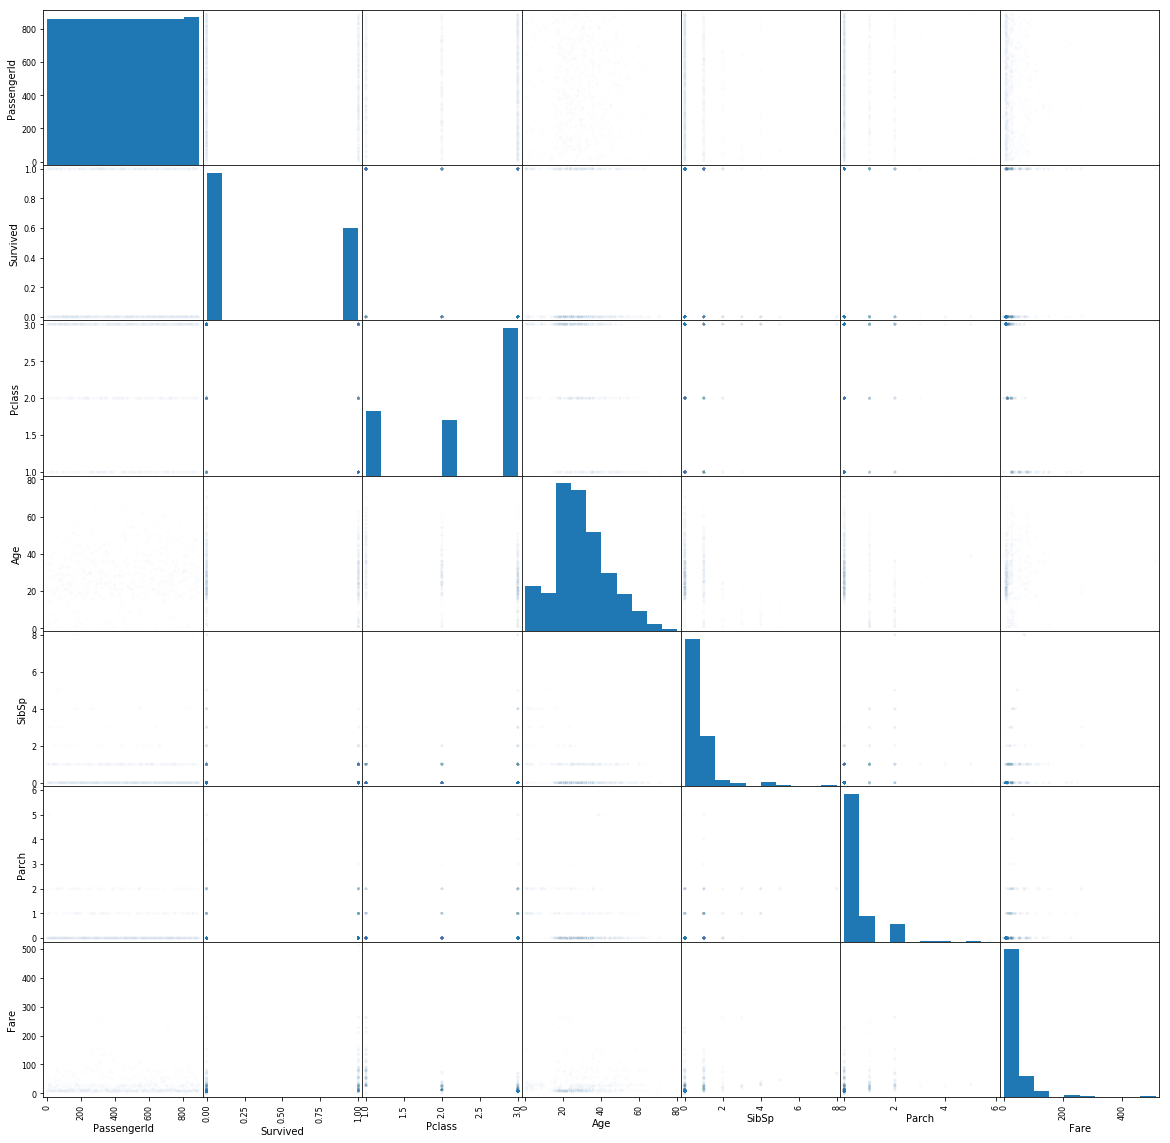

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (20, 20))
pass

#### Cleaning dataset, excluding non-necessary features

In [5]:
data = data.drop("Name", axis = 1)
data = data.drop("PassengerId", axis = 1)

In [6]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Sex', 'Ticket', 'Cabin', 'Embarked']
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [7]:
# for c in categorical_columns:
#     print(c, data[c].unique())

In [8]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [9]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [10]:
data.describe(include = [object])

,Sex,Ticket,Cabin,Embarked
count,891,891,891,891
unique,2,681,147,3
top,male,1601,G6,S
freq,577,7,691,646


#### Binarisation of text feature

In [11]:
data.at[data['Sex'] == 'male', 'Sex'] = 0
data.at[data['Sex'] == 'female', 'Sex'] = 1
data['Sex'].describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [12]:
# data

In [13]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Sex'] ['Ticket', 'Cabin', 'Embarked']


In [14]:
binary_columns.append('Survived')

In [15]:
print(binary_columns, nonbinary_columns)

['Sex', 'Survived'] ['Ticket', 'Cabin', 'Embarked']


#### Vectorization

In [16]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
#print(data_nonbinary.columns)

In [17]:
numerical_columns

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [18]:
numerical_columns.remove("Survived")

In [19]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


#### Standartization of numerical features

In [20]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Pclass,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-4.386066e-17,2.312653e-16,1.594933e-17,3.588600e-17,7.237009e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.565228e+00,-2.222908e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01
25%,-3.691575e-01,-5.654189e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01
50%,8.269128e-01,-1.045787e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01
75%,8.269128e-01,4.330683e-01,4.325504e-01,-4.734077e-01,-2.423274e-02
max,8.269128e-01,3.889370e+00,6.780355e+00,6.970233e+00,9.661740e+00


#### Concatination of all features in a single table
#### Splitting matrix of features and target vector

In [21]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
#print(data.shape)
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Sex,Survived
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,-4.386066e-17,2.312653e-16,1.594933e-17,3.588600e-17,7.237009e-16,0.003367,0.003367,0.002245,0.001122,0.001122,...,0.003367,0.001122,0.002245,0.775533,0.001122,0.188552,0.086420,0.725028,0.352413,0.383838
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.057961,0.057961,0.047351,0.033501,0.033501,...,0.057961,0.033501,0.047351,0.417465,0.033501,0.391372,0.281141,0.446751,0.477990,0.486592
min,-1.565228e+00,-2.222908e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.691575e-01,-5.654189e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.269128e-01,-1.045787e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.269128e-01,4.330683e-01,4.325504e-01,-4.734077e-01,-2.423274e-02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,8.269128e-01,3.889370e+00,6.780355e+00,6.970233e+00,9.661740e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
X = data.drop(('Survived'), axis = 1)
y = data['Survived']
feature_names = X.columns

#### Single fitting kNN

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 


In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [25]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.17174959871589085 0.20149253731343283


In [26]:
err_test = 1 - knn.score(X_test, y_test)

#### An error of kNN method

In [27]:
err_test

0.20149253731343286

#### Cross-validation via grid of neighbors
#### and choising best amounth of neighbors

In [28]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.1910112359550562 10


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.17174959871589085 0.20149253731343283


#### A confusion matrix demonstrated below

In [30]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))


[[147  10]
 [ 44  67]]


#### Another variant of cross-validation may be realized via cross_val_score function:

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scores = []
kf = KFold(n_splits=10, random_state=42, shuffle=True)

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors = k)
    tmp_scores = cross_val_score(knn, X_train, y_train, cv=kf.split(X_train), scoring='accuracy')
    tmp_scores = tmp_scores.mean()
#     print(k, tmp_scores)
    scores.append(tmp_scores)

#### optimal K for KNN was found:

In [32]:
opt_nightbors = scores.index(max(scores))+1
opt_nightbors

17

In [33]:
1-max(scores)

0.1750128008192524

In [34]:
knn = KNeighborsClassifier(n_neighbors = opt_nightbors).fit(X_train, y_train)

In [35]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.1653290529695024 0.20522388059701493


#### Lets try to find an optimal parameter *p* in the Minkowski metric
# $$\rho_p=\left(\sum|x_j-z_j|^p\right)^\frac{1}{p}$$
#### with fixed optimal amount of neighbors

In [36]:
p_mink_values= np.linspace(1, 5, 50)
p_mink_values = list(p_mink_values)

In [37]:
scores = []
kf = KFold(n_splits=10, random_state=42, shuffle=True)

for p in p_mink_values:
    knn = KNeighborsClassifier(n_neighbors=opt_nightbors, metric='minkowski', p = p)
    tmp_scores = cross_val_score(knn, X_train, y_train, cv=kf.split(X_train), scoring='neg_mean_squared_error')
    tmp_scores = tmp_scores.mean()
#     print(p_mink_values.index(p), tmp_scores)
    scores.append(tmp_scores)


#### optimal parameter in Minkowski metric is

In [38]:
p_opt = p_mink_values[scores.index(max(scores))]
p_opt

1.0

#### Lets train model with kNN using optimal n_neighbors and p:

In [39]:
knn = KNeighborsClassifier(n_neighbors = opt_nightbors, 
                           metric='minkowski', 
                           p = p_opt).fit(X_train, y_train)

#### Error values is 

In [40]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.16051364365971107 0.19029850746268656


### PCA


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_2 = pca.fit_transform(X_train)
pdf = pd.DataFrame(data = pc_2, columns = ['pc 1', 'pc 2'])
pdf


,pc 1,pc 2
0,1.145510,1.611660
1,-0.420870,-1.086394
2,1.805532,-1.098587
3,1.005533,0.729453
4,0.112172,0.583831
5,-0.521319,2.985289
6,0.568104,0.423046
7,-0.453072,-1.064498
8,-0.096128,-1.279359
9,-0.751875,-0.176363


In [42]:
res = pd.concat([pdf, pd.DataFrame(data = np.array(y_train), columns = ['y'])], axis = 1)
res

,pc 1,pc 2,y
0,1.145510,1.611660,1
1,-0.420870,-1.086394,0
2,1.805532,-1.098587,1
3,1.005533,0.729453,0
4,0.112172,0.583831,0
5,-0.521319,2.985289,0
6,0.568104,0.423046,1
7,-0.453072,-1.064498,0
8,-0.096128,-1.279359,0
9,-0.751875,-0.176363,0


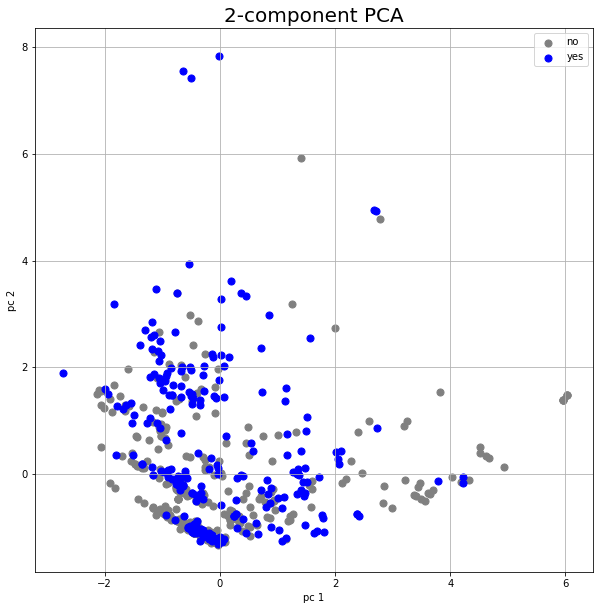

In [43]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 1', fontsize = 10)
ax.set_ylabel('pc 2', fontsize = 10)
ax.set_title('2-component PCA', fontsize = 20)
targets = [0, 1]
colors = ['gray', 'blue']
for target, color in zip(targets,colors):
    ipc = res['y'] == target
    ax.scatter(res.loc[ipc, 'pc 1'], res.loc[ipc, 'pc 2'], c = color, s = 50)
ax.legend(['no', 'yes'])
ax.grid()

In [44]:
err_train_pc = []
err_test_pc = []
for i in range(1,51):
    pca = PCA(n_components=i)
    pc_train = pca.fit_transform(X_train)
    pc_test = pca.fit_transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = opt_nightbors).fit(pc_train, y_train)
    y_train_predict = knn.predict(pc_train)
    y_test_predict = knn.predict(pc_test)

    err_train = np.mean(y_train != y_train_predict)
    err_test  = np.mean(y_test  != y_test_predict)
    err_train_pc.append(err_train)
    err_test_pc.append(err_test)


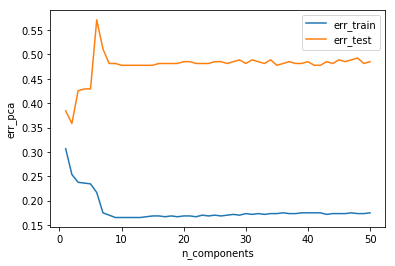

In [45]:
plt.plot(range(1,51), err_train_pc, label='err_train')
plt.plot(range(1,51), err_test_pc, label='err_test')
plt.xlabel('n_components')

plt.ylabel('err_pca')
plt.legend()

### I'm in trouble now according to graph above

In [46]:
pca = PCA(n_components=2)
pc_train = pca.fit_transform(X_train)
pc_test = pca.fit_transform(X_test)
scores = []
kf = KFold(n_splits=10, random_state=42, shuffle=True)

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors = k)
    tmp_scores = cross_val_score(knn, pc_train, y_train, cv=kf.split(pc_train), scoring='accuracy')
    tmp_scores = tmp_scores.mean()
#     print(k, tmp_scores)
    scores.append(tmp_scores)

In [47]:
opt_nightbors = scores.index(max(scores))+1
opt_nightbors

10

In [48]:
knn = KNeighborsClassifier(n_neighbors = opt_nightbors).fit(X_train, y_train)

In [49]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.17174959871589085 0.20149253731343283


### MLP

In [110]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (100,1), solver='lbfgs', activation = 'logistic', random_state=42)
mlp.fit(X_train, y_train)

err_train = np.mean(y_train != mlp.predict(X_train))
err_test  = np.mean(y_test  != mlp.predict(X_test))

print("train error: " + str(err_train)) 
print("test error: " + str(err_test))

train error: 0.0032102728731942215
test error: 0.1865671641791045


In [111]:
mlp2 = MLPClassifier(hidden_layer_sizes = (100,2), solver='lbfgs', activation = 'logistic', random_state=42)
mlp2.fit(X_train, y_train)

err_train = np.mean(y_train != mlp2.predict(X_train))
err_test  = np.mean(y_test  != mlp2.predict(X_test))

print("train error: " + str(err_train)) 
print("test error: " + str(err_test))

train error: 0.009630818619582664
test error: 0.19029850746268656


In [112]:
mlp3 = MLPClassifier(hidden_layer_sizes = (100,3), solver='lbfgs', activation = 'logistic', random_state=42)
mlp3.fit(X_train, y_train)

err_train = np.mean(y_train != mlp3.predict(X_train))
err_test  = np.mean(y_test  != mlp3.predict(X_test))

print("train error: " + str(err_train)) 
print("test error: " + str(err_test))

train error: 0.0032102728731942215
test error: 0.20522388059701493


### Alpha parameter variation

In [132]:
train_er, test_er = [], []
alpha_massive = np.linspace(0.0001, 4, 20)
alpha_massive = list(alpha_massive)
print(alpha_massive)
for a in alpha_massive:
    mlp = MLPClassifier(hidden_layer_sizes = (100,1), solver='lbfgs', 
                        activation = 'logistic', alpha=a, max_iter=200, random_state=42)
    mlp.fit(X_train, y_train)
    err_train = np.mean(y_train != mlp.predict(X_train))
    err_test = np.mean(y_test != mlp.predict(X_test))
    print(err_test)
    train_er.append(err_train)
    test_er.append(err_test)    

[0.0001, 0.21062105263157893, 0.4211421052631579, 0.6316631578947368, 0.8421842105263158, 1.0527052631578948, 1.2632263157894736, 1.4737473684210525, 1.6842684210526315, 1.8947894736842106, 2.10531052631579, 2.3158315789473685, 2.5263526315789475, 2.7368736842105266, 2.947394736842105, 3.1579157894736842, 3.3684368421052633, 3.5789578947368423, 3.7894789473684214, 4.0]
0.0032102728731942215
0.004815409309791332
0.006420545746388443
0.006420545746388443
0.009630818619582664
0.009630818619582664
0.009630818619582664
0.009630818619582664
0.011235955056179775
0.011235955056179775
0.02247191011235955
0.04173354735152488
0.051364365971107544
0.07062600321027288
0.1043338683788122
0.14446227929373998
0.15409309791332262
0.3707865168539326
0.15890850722311398
0.3707865168539326


In [134]:
alpha_opt = alpha_massive[test_er.index(min(test_er))]
print(alpha_opt)
index = test_er.index(min(test_er))
print(train_er[index])
print(test_er[index])


1.2632263157894736
0.009630818619582664
0.15298507462686567


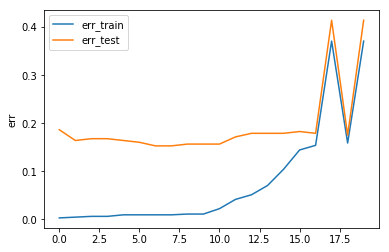

In [135]:
plt.plot(train_er, label='err_train')
plt.plot(test_er, label='err_test')

plt.ylabel('err')
plt.legend()

### Amount of neuron variation


In [141]:
train_er, test_er = [], []
neur_massive = np.linspace(10, 200, 10)
neur_massive = list([int(n) for n in neur_massive])
print(neur_massive)
for n in neur_massive:
    mlp = MLPClassifier(hidden_layer_sizes = (n,1), solver='lbfgs', 
                        activation = 'logistic', alpha=alpha_opt, 
                        max_iter=200, random_state=42)
    mlp.fit(X_train, y_train)
    err_train = np.mean(y_train != mlp.predict(X_train))
    err_test = np.mean(y_test != mlp.predict(X_test))
    print(err_test)
    train_er.append(err_train)
    test_er.append(err_test)  

[10, 31, 52, 73, 94, 115, 136, 157, 178, 200]
0.15298507462686567
0.15298507462686567
0.15671641791044777
0.15671641791044777
0.15671641791044777
0.4141791044776119
0.4141791044776119
0.39552238805970147
0.15298507462686567
0.15298507462686567


In [142]:
neur_opt = neur_massive[test_er.index(min(test_er))]
print(neur_opt)
index = test_er.index(min(test_er))
print(train_er[index])
print(test_er[index])

10
0.009630818619582664
0.15298507462686567


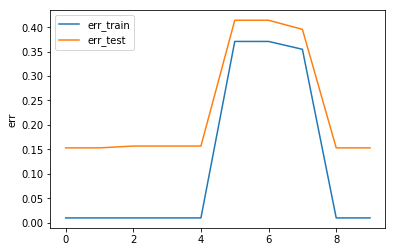

In [143]:
plt.plot(train_er, label='err_train')
plt.plot(test_er, label='err_test')

plt.ylabel('err')
plt.legend()

#### Random Forest

In [147]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000, oob_score=True, random_state=42)
rf.fit(X_train, y_train)
oob_error = 1 - rf.oob_score_
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("train error: " + str(err_train)) 
print("test error: " + str(err_test))
print("oob-error: " + str(oob_error))

train error: 0.0016051364365971107
test error: 0.1865671641791045
oob-error: 0.1685393258426966


In [155]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


(-1, 10)

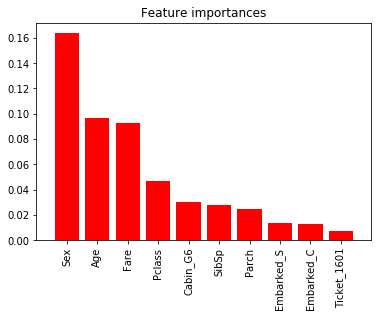

In [156]:
d_first = 10
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

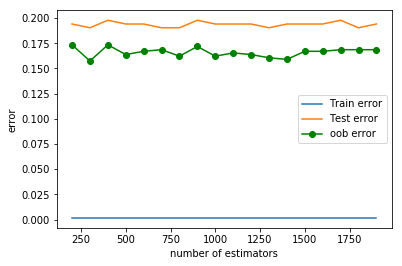

In [162]:
trees_massive = range(200, 2000, 100)
err_train_mas = []
err_test_mas = []
err_oob = []
for t_cur in trees_massive:
    mod_t = ensemble.RandomForestClassifier(n_estimators = t_cur, oob_score=True, random_state=42)
    mod_t.fit(X_train, y_train)
    oob_error = 1 - mod_t.oob_score_
    err_train_mas.append(np.mean(mod_t.predict(X_train) != y_train))
    err_test_mas.append(np.mean(mod_t.predict(X_test) != y_test))
    err_oob.append(oob_error)
plt.plot(trees_massive, err_train_mas, label = 'Train error')
plt.plot(trees_massive, err_test_mas, label = 'Test error') 
plt.plot(trees_massive, err_oob,  'g-o', label = 'oob error')    
plt.xlabel('number of estimators')
plt.ylabel('error')

plt.legend()


#### GBT

In [164]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print("train error: " + str(err_train)) 
print("test error: " + str(err_test))

train error: 0.0016051364365971107
test error: 0.1791044776119403


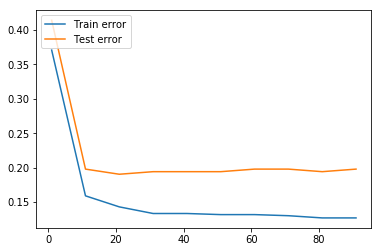

In [168]:
ran_tree = range(1, 100, 10)
err_train_mas = []
err_test_mas = []
for t_cur in ran_tree:
    mod_t = ensemble.GradientBoostingClassifier(n_estimators = t_cur)
    mod_t.fit(X_train, y_train)
    err_train_mas.append(np.mean(mod_t.predict(X_train) != y_train))
    err_test_mas.append(np.mean(mod_t.predict(X_test) != y_test))
    err_oob.append(np.mean(mod_t.predict(X_test) != y_test))
plt.plot(ran_tree, err_train_mas, label = 'Train error')
plt.plot(ran_tree, err_test_mas, label = 'Test error')

plt.legend(loc = 2)

## TBD: summary